# Transfer learning
https://www.learnopencv.com/image-classification-using-transfer-learning-in-pytorch/

In [2]:
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time
from torchsummary import summary

import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image

In [3]:
# Define image transformations
image_transforms = { 
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [4]:
# Load the Data

# Set train and valid directory paths

dataset = 'C:/Users/fe47tep/Desktop/2024-10-15_Image_Classification/Leaves_Dataset'

train_directory = os.path.join(dataset, 'train')
valid_directory = os.path.join(dataset, 'valid')

# Batch size
bs = 16

# Number of classes
num_classes = len(os.listdir(valid_directory))  #10#2#257
print(num_classes)

# Load Data from folders
data = {
    'train': datasets.ImageFolder(root=train_directory, transform=image_transforms['train']),
    'valid': datasets.ImageFolder(root=valid_directory, transform=image_transforms['valid'])
}

# Get a mapping of the indices to the class names, in order to see the output classes of the test images.
idx_to_class = {v: k for k, v in data['train'].class_to_idx.items()}
print(idx_to_class)

# Size of Data, to be used for calculating Average Loss and Accuracy
train_data_size = len(data['train'])
valid_data_size = len(data['valid'])

# Create iterators for the Data loaded using DataLoader module
train_data_loader = DataLoader(data['train'], batch_size=bs, shuffle=True)
valid_data_loader = DataLoader(data['valid'], batch_size=bs, shuffle=True)

11
{0: 'Fern', 1: 'Ginkgo', 2: 'Ivy', 3: 'Kummerowia striata', 4: 'Laciniata', 5: 'Macrolobium acaciifolium', 6: 'Micranthes odontoloma', 7: 'Murraya', 8: 'No Leaf', 9: 'Robinia pseudoacacia', 10: 'Selaginella davidi franch'}


In [5]:
train_data_size, valid_data_size

(176, 33)

In [6]:
alexnet = models.alexnet(pretrained=True)
alexnet

C:\Users\fe47tep\AppData\Local\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\fe47tep\AppData\Local\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [7]:
# Freeze model parameters
for param in alexnet.parameters():
    param.requires_grad = False

In [8]:
# Change the final layer of AlexNet Model for Transfer Learning
alexnet.classifier[6] = nn.Linear(4096, num_classes)
alexnet.classifier.add_module("7", nn.LogSoftmax(dim = 1))
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [9]:
summary(alexnet, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [10]:
# Define Optimizer and Loss Function
loss_func = nn.NLLLoss()
optimizer = optim.Adam(alexnet.parameters())
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [11]:
import os
from torchvision.utils import save_image

# Directory to save augmented images
augmented_image_dir = os.path.join(dataset, 'augmented_images')
os.makedirs(augmented_image_dir, exist_ok=True)

def save_augmented_images(images, epoch, batch, prefix='train'):
    '''
    Save augmented images to disk for visualization and verification.
    :param images: Tensor of images
    :param epoch: Current epoch number
    :param batch: Current batch number
    :param prefix: 'train' or 'valid' to distinguish datasets
    '''
    for i in range(images.size(0)):  # Loop over batch
        img_name = f'{prefix}_epoch{epoch}_batch{batch}_img{i}.png'
        img_path = os.path.join(augmented_image_dir, img_name)
        save_image(images[i], img_path)  # Save image as PNG
        
def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)
  
    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    
    start = time.time()
    history = []
    best_acc = 0.0

    # Path to save the model (to Desktop with specified name)
    model_save_path = 'C:/Users/fe47tep/Desktop/2024-10-15_Image_Classification/21-10_Image_Classification_bs_16.pth'


    for epoch in range(epochs):
        epoch_start = time.time()
        print(f"Epoch: {epoch+1}/{epochs}")
        
        # Set to training mode
        model.train()
        
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(train_data_loader):

            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Save augmented images
            save_augmented_images(inputs, epoch, i, prefix='train')
            
            # Clean existing gradients
            optimizer.zero_grad()
            
            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)
            
            # Compute loss
            loss = loss_criterion(outputs, labels)
            
            # Backpropagate the gradients
            loss.backward()
            
            # Update the parameters
            optimizer.step()
            
            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():
            model.eval()
            for j, (inputs, labels) in enumerate(valid_data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Save augmented validation images
                #save_augmented_images(inputs, epoch, j, prefix='valid')

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)
            
        # Find average training loss and accuracy
        avg_train_loss = train_loss / train_data_size
        avg_train_acc = train_acc / train_data_size

        # Find average validation loss and accuracy
        avg_valid_loss = valid_loss / valid_data_size
        avg_valid_acc = valid_acc / valid_data_size

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])
                
        epoch_end = time.time()
        print(f"Epoch : {epoch+1}, Training: Loss: {avg_train_loss:.4f}, Accuracy: {avg_train_acc*100:.4f}%, "
              f"Validation: Loss: {avg_valid_loss:.4f}, Accuracy: {avg_valid_acc*100:.4f}%, Time: {epoch_end-epoch_start:.4f}s")

    torch.save(model.state_dict(), model_save_path) # Save the model after all epochs
    print(f"The model is saved at: {model_save_path}")
    return model, history



In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = 10
trained_model, history = train_and_validate(alexnet, loss_func, optimizer, num_epochs)

torch.save(history, dataset+'_history.pt')


Epoch: 1/10
Epoch : 1, Training: Loss: 1.7310, Accuracy: 40.9091%, Validation: Loss: 0.7222, Accuracy: 87.8788%, Time: 37.9390s
Epoch: 2/10
Epoch : 2, Training: Loss: 0.6602, Accuracy: 85.2273%, Validation: Loss: 0.3864, Accuracy: 90.9091%, Time: 38.0925s
Epoch: 3/10
Epoch : 3, Training: Loss: 0.3674, Accuracy: 95.4545%, Validation: Loss: 0.2793, Accuracy: 96.9697%, Time: 38.0298s
Epoch: 4/10
Epoch : 4, Training: Loss: 0.2770, Accuracy: 96.0227%, Validation: Loss: 0.2134, Accuracy: 93.9394%, Time: 37.9674s
Epoch: 5/10
Epoch : 5, Training: Loss: 0.2263, Accuracy: 96.0227%, Validation: Loss: 0.2163, Accuracy: 90.9091%, Time: 38.0498s
Epoch: 6/10
Epoch : 6, Training: Loss: 0.1729, Accuracy: 98.2955%, Validation: Loss: 0.2092, Accuracy: 93.9394%, Time: 37.9753s
Epoch: 7/10
Epoch : 7, Training: Loss: 0.1514, Accuracy: 98.2955%, Validation: Loss: 0.2039, Accuracy: 93.9394%, Time: 37.9499s
Epoch: 8/10
Epoch : 8, Training: Loss: 0.1456, Accuracy: 97.7273%, Validation: Loss: 0.1717, Accuracy: 9

In [36]:
import torch

# Define the path to save the ONNX model
onnx_model_path = "C:/Users/fe47tep/Desktop/2024-10-15_Image_Classification/2024-10-15_Image_Classification_AlexNet_Successful_Models/21-10_Image_Classification_bs_16.onnx"

# Create a dummy input tensor with the same shape as the training data (batch size, channels, height, width)
dummy_input = torch.randn(1, 3, 224, 224).to(device)  # Adjust dimensions based on your input shape

# Export the model to ONNX
torch.onnx.export(
    trained_model,            # Model to export
    dummy_input,              # Dummy input tensor
    onnx_model_path,          # Output file path
    input_names=["input"],    # Name of the input node
    output_names=["output"],  # Name of the output node
    export_params=True,       # Store trained parameter weights inside the model
    opset_version=11,         # ONNX version (e.g., 11 or 12)
    do_constant_folding=True, # Whether to apply constant folding for optimization
    verbose=True              # Print model graph
)

print(f"Model successfully saved to: {onnx_model_path}")


Model successfully saved to: C:/Users/fe47tep/Desktop/2024-10-15_Image_Classification/2024-10-15_Image_Classification_AlexNet_Successful_Models/21-10_Image_Classification_bs_16.onnx


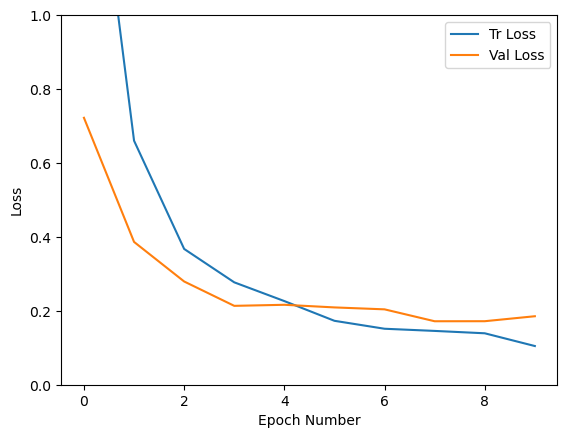

In [14]:
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.savefig(dataset+'_loss_curve.png')
plt.show()

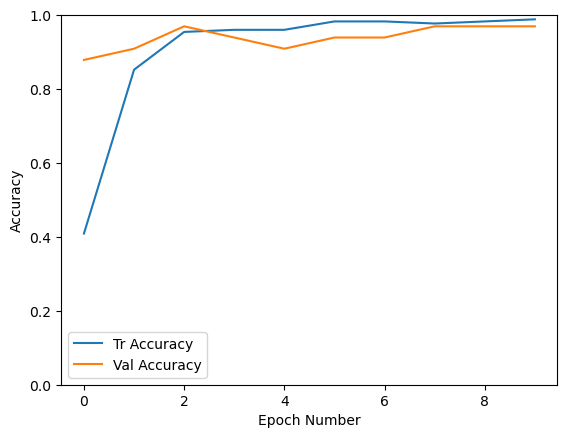

In [15]:
plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.savefig(dataset+'_accuracy_curve.png')
plt.show()

#After adding online images to their respected directories and now each class having 5 test images in their folders

Test Data Size: 33
Confusion Matrix:
[[3 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0]
 [0 0 2 1 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 2 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 2]]


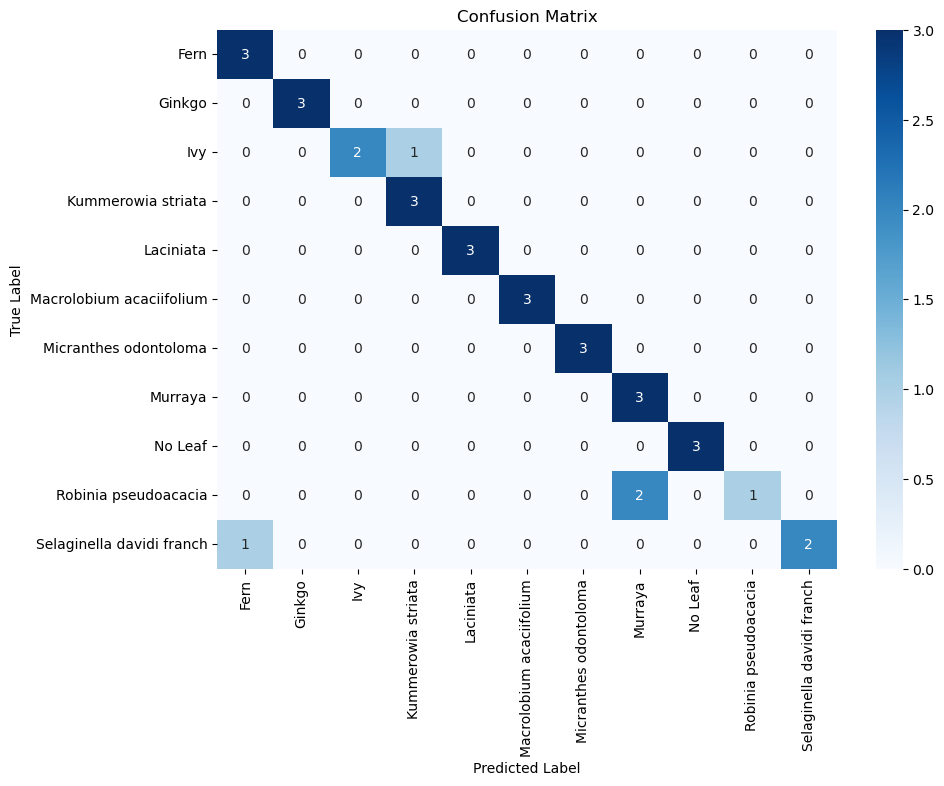


Classification Report:
                           precision    recall  f1-score   support

                     Fern       0.75      1.00      0.86         3
                   Ginkgo       1.00      1.00      1.00         3
                      Ivy       1.00      0.67      0.80         3
       Kummerowia striata       0.75      1.00      0.86         3
                Laciniata       1.00      1.00      1.00         3
 Macrolobium acaciifolium       1.00      1.00      1.00         3
    Micranthes odontoloma       1.00      1.00      1.00         3
                  Murraya       0.60      1.00      0.75         3
                  No Leaf       1.00      1.00      1.00         3
     Robinia pseudoacacia       1.00      0.33      0.50         3
Selaginella davidi franch       1.00      0.67      0.80         3

                 accuracy                           0.88        33
                macro avg       0.92      0.88      0.87        33
             weighted avg       0.92

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns
import pandas as pd
model_path = "C:/Users/fe47tep/Desktop/2024-10-15_Image_Classification/21-10_Image_Classification_bs_16.pth"
# Load the test dataset
test_directory = os.path.join(dataset, 'test')

# Load Data from test folder
test_data = datasets.ImageFolder(root=test_directory, transform=image_transforms['test'])

# Create DataLoader for the test data
test_data_loader = DataLoader(test_data, batch_size=bs, shuffle=False)

# Size of Test Data
test_data_size = len(test_data)

print(f"Test Data Size: {test_data_size}")

def evaluate_test_set(model_path, data_loader):
    """
    Function to predict and evaluate on the test set.
    Parameters
        :param model: Trained model
        :param data_loader: DataLoader for test data
    Returns
        None (Prints confusion matrix and classification report)
    """

    # Set the model to evaluation mode
    model_path.eval()

    # Lists to store true and predicted labels
    true_labels = []
    predicted_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Forward pass to get predictions
            outputs = model_path(inputs)
            _, preds = torch.max(outputs, 1)
            
            # Append true labels and predicted labels
            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(preds.cpu().numpy())

    # Calculate the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Print confusion matrix
    print("Confusion Matrix:")
    print(cm)

    # Plot the confusion matrix using seaborn heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=idx_to_class.values(), yticklabels=idx_to_class.values())
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification report with F1 score
    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels, target_names=idx_to_class.values()))

    # Calculate F1 score (macro-averaged)
    f1 = f1_score(true_labels, predicted_labels, average='macro')
    print(f"Macro-averaged F1 Score: {f1:.4f}")

# Call the evaluation function
evaluate_test_set(trained_model, test_data_loader)


Total number of test images: 33
Number of correct predictions: 29
Number of incorrect predictions: 4
Accuracy on test set:87.88%


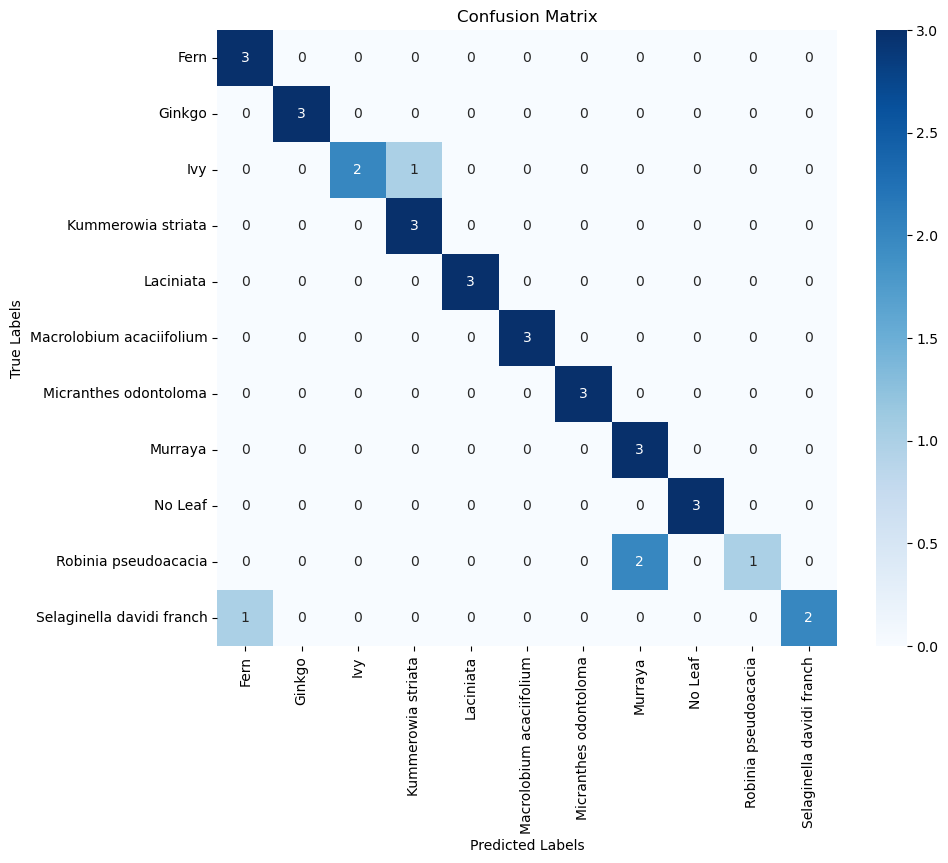

In [18]:
import os
import torch
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Define the directory containing the images to predict
predict_directory = 'C:/Users/fe47tep/Desktop/2024-10-15_Image_Classification/Leaves_Dataset/test' 
# Load the test data
test_directory = os.path.join(dataset, 'test')  # Assuming you have a 'test' folder
data['test'] = datasets.ImageFolder(root=test_directory, transform=image_transforms['test'])

# Create a DataLoader for the test set
test_data_loader = DataLoader(data['test'], batch_size=bs, shuffle=True)
test_data_size=len(data['test'])
# Function to predict and store results for images in the specified directory
def predict_images(model, predict_directory):
    model.eval()  # Set the model to evaluation mode
    
    true_labels = []
    predicted_labels = []

    # Walk through each subfolder (class folder) and images
    for root, dirs, files in os.walk(predict_directory):
        for filename in files:
            if filename.endswith(('.jpg', '.jpeg', '.png')):  # Image file extensions
                image_path = os.path.join(root, filename)
                image = Image.open(image_path)
                
                # Apply the transformations and move the image to the device (CPU or GPU)
                transform = image_transforms['test']  
                image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension
                
                # Get the true label from the folder name
                true_class = os.path.basename(root)  # Folder name is the true class

                # Predict the top class
                with torch.no_grad():
                    out = model(image_tensor)
                    ps = torch.exp(out)  # Get probabilities
                    _, topclass = ps.topk(1, dim=1)  # Get the top class

                    # Predicted class (as an index)
                    predicted_class_index = topclass.cpu().numpy()[0][0]

                    # Convert predicted class index to class name
                    predicted_class = data['train'].classes[predicted_class_index]

                    # Append the true and predicted class for confusion matrix
                    true_labels.append(true_class)
                    predicted_labels.append(predicted_class)

    return true_labels, predicted_labels

# Get predictions and true labels
true_labels, predicted_labels = predict_images(trained_model, predict_directory)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=data['train'].classes)

accuracy=accuracy_score(predicted_labels,true_labels)

print(f"Total number of test images: {test_data_size}")
print(f"Number of correct predictions: {sum(cm.diagonal())}")
print(f"Number of incorrect predictions: {test_data_size - sum(cm.diagonal())}")
print(f"Accuracy on test set:{accuracy*100:.2f}%")
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['train'].classes, yticklabels=data['train'].classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
